<a href="https://colab.research.google.com/github/Lee-gp/classification/blob/main/project2_Minist_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 加载数据
digits = load_digits()
data = digits.data

In [3]:
# 数据探索
data.shape

(1797, 64)

In [4]:
# 查看第一幅图及其含义
print(digits.images[0])
print(digits.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


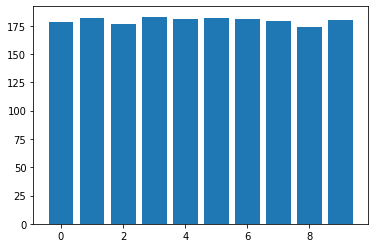

In [5]:
#查看target的分布情况
unique,count = np.unique(digits.target,return_counts= True)
unique_count = dict(zip(unique,count))
# print(unique_count)
plt.bar(unique,unique_count.values())
plt.show()

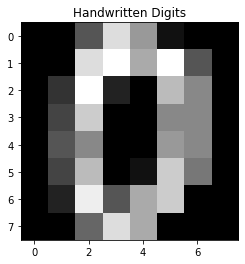

In [6]:
# 将第一幅图显示出来
plt.gray()
plt.title('Handwritten Digits')
plt.imshow(digits.images[0])
plt.show()

In [7]:
# 分割数据集，将25作为测试集，其余作为训练集
train_X,test_X,train_y,test_y = train_test_split(data,digits.target,test_size = 0.25,random_state = 33)

In [8]:
# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_X)
test_ss_x = ss.transform(test_X)

In [9]:
# 使用LR预测
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_ss_x,train_y)
predict_y = lr.predict(test_ss_x)
#print(predict_y)
#print(lr.coef_)
#print(len(lr.coef_))
print('LR的准确率：%.4lf'%accuracy_score(predict_y,test_y))

LR的准确率：0.9644


In [10]:
# 使用decisiontree预测
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

#建立模型
cart = DecisionTreeClassifier()
#使用GridSearchCV寻找模型参数
max_depth = range(1,100,1)
min_samples_leaf = (1,40,2)
min_samples_split = (2,40,2)
criterion = ["gini","entropy"]
splitter = ["best"]
max_features = [None]
tuned_parameters = dict(max_depth=max_depth,
             min_samples_leaf=min_samples_leaf,
             min_samples_split=min_samples_split,
             criterion=criterion,
             max_features=max_features,
             splitter=splitter)

cart_model = GridSearchCV(cart,tuned_parameters,cv=10)
cart_model.fit(train_ss_x,train_y)
# 使用模型预测并评分
predict_y = cart_model.predict(test_ss_x)
score = accuracy_score(predict_y,test_y)
print('决策树预测准确率：%.4lf'%score)

决策树预测准确率：0.8356


In [11]:
#使用keras预测
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import numpy as np

# 数据加载
(train_x, train_y), (test_x, test_y) = mnist.load_data() #从网上下载数据集

# 输入数据为 mnist 数据集
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
train_x = train_x / 255
test_x = test_x / 255
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)
# 创建序贯模型
model = Sequential()
# 第一层卷积层：6个卷积核，大小为5∗5, relu激活函数
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# 第二层池化层：最大池化
model.add(MaxPooling2D(pool_size=(2, 2)))
# 第三层卷积层：16个卷积核，大小为5*5，relu激活函数
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# 第四层池化层：最大池化
model.add(MaxPooling2D(pool_size=(2, 2)))
# 将参数进行扁平化
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# 全连接层，输出节点个数为84个
model.add(Dense(84, activation='relu'))
# 输出层 用softmax 激活函数计算分类概率
model.add(Dense(10, activation='softmax'))
# 设置损失函数和优化器配置
model.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
# 传入训练数据进行训练
model.fit(train_x, train_y, batch_size=128, epochs=2, verbose=1, validation_data=(test_x, test_y))
# 对结果进行评估
score = model.evaluate(test_x, test_y)
print('误差:%0.4lf' %score[0])
print('准确率:', score[1])

2.3.0
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/2
469/469 [==============================] - 22s 47ms/step - loss: 0.3116 - accuracy: 0.9072 - val_loss: 0.0992 - val_accuracy: 0.9703
Epoch 2/2
313/313 [==============================] - 2s 7ms/step - loss: 0.0601 - accuracy: 0.9811
误差:0.0601
准确率: 0.9811000227928162
